In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib.DataWriter import DataWriter
INTERSECTION_HUMAN = {
    0: 'Fourway',
    1: 'Traffic lights',
    2: 'Equivalent',
    3: 'Smart lights'
}
INTERSECTION_COLOR = {
    0: 'b',
    1: 'c',
    2: 'g',
    3: 'r'
}

def get_parameters(p_spawn=0.1, max_speed_horizontal=10, max_speed_vertical=10, intersection_type=0):
    t_traffic_light_cycle=50
    p_bend = 0.33
    p_u_turn = 0.01
    p_left = p_bend
    p_right = p_bend
    p_straight = p_bend
    t_from_north = t_traffic_light_cycle
    t_from_west = t_traffic_light_cycle
    t_from_east = t_traffic_light_cycle
    t_from_south = t_traffic_light_cycle

    intersection_type = int(intersection_type)
    intersections = ['Fourway', 'Traffic lights', 'Equivalent', 'Smart lights']
    intersection = intersections[intersection_type]

    parameters = {
        "max_speed_horizontal": max_speed_horizontal,
        "max_speed_vertical": max_speed_vertical,
        "bmw_fraction": 0.1,
        "seed": 1337,
        "intersection_type": intersection,
        "t_from_north": t_from_north,
        "t_from_west": t_from_west,
        "t_from_east": t_from_east,
        "t_from_south": t_from_south,
        "p_car_spawn_north": p_spawn,
        "p_north_to_north": p_u_turn,
        "p_north_to_west": p_right,
        "p_north_to_east": p_left,
        "p_north_to_south": p_straight,
        "p_car_spawn_west": p_spawn,
        "p_west_to_north": p_left,
        "p_west_to_west": p_u_turn,
        "p_west_to_east": p_straight,
        "p_west_to_south": p_right,
        "p_car_spawn_east": p_spawn,
        "p_east_to_north": p_right,
        "p_east_to_west": p_straight,
        "p_east_to_east": p_u_turn,
        "p_east_to_south": p_left,
        "p_car_spawn_south": p_spawn,
        "p_south_to_north": p_straight,
        "p_south_to_west": p_left,
        "p_south_to_east": p_right,
        "p_south_to_south": p_u_turn,
    }
    return parameters

def get_mean_last_runs(dataset, i):
    n = len(dataset)
    k = n - i
    return float(dataset[-1] * n - dataset[k] * k) / float(i)

def get_time_till_convergence(dataset):
    epsilon = 0.01
    x_n = max(dataset)
    for k, x_0 in enumerate(dataset):
        if abs(x_n - x_0) < epsilon:
            return k

In [13]:
def throughput_vs_maximal_speed(**kwargs):
    p_spawn = kwargs['p_spawn']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        for p in range(1, 11):
            p_spawn = p / 10.0
            throughput = []
            maximal_speed = []
            for max_speed in range(3, 24):
                max_speed_horizontal = max_speed_vertical = max_speed
                parameters = get_parameters(p_spawn, max_speed_horizontal, max_speed_vertical, intersection_type)
                data = datawriter.get_runs_by_parameters(parameters)
                throughput.append(get_mean_last_runs(data['results']['throughput'], 900))
                
                maximal_speed.append((data['parameters']['max_speed_vertical'] + data['parameters']['max_speed_horizontal']) / 2.0)
            plt.scatter(maximal_speed, throughput, color=INTERSECTION_COLOR[intersection_type], alpha=0.1)
#     plt.legend()
    plt.xlabel('Maximal speed')
    plt.ylabel('Throughput')
    plt.ylim((0, 0.25))
    plt.show()
    
def mean_crossover_vs_maximal_speed(**kwargs):
    p_spawn = kwargs['p_spawn']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        mean_crossover = []
        maximal_speed = []
        for max_speed in range(3, 24):
            max_speed_horizontal = max_speed_vertical = max_speed
            parameters = get_parameters(p_spawn, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            mean_crossover.append(data['results']['mean_crossover_time'][-1])
            maximal_speed.append((data['parameters']['max_speed_vertical'] + data['parameters']['max_speed_horizontal']) / 2.0)
        plt.scatter(maximal_speed, mean_crossover, label=INTERSECTION_HUMAN[intersection_type])
#     plt.legend()
    plt.xlabel('Maximal speed')
    plt.ylabel('Mean crossover time')
    plt.show()
    
def throughput_vs_p_spawn(**kwargs):
    max_speed_horizontal = kwargs['max_speed_horizontal']
    max_speed_vertical = kwargs['max_speed_vertical']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        throughput = []
        p_spawn = []
        for p in range(1, 10):
            p = p / 10.0
            parameters = get_parameters(p, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            p_spawn.append(p)
            throughput.append(data['results']['throughput'][-1])
        plt.scatter(p_spawn, throughput, label=INTERSECTION_HUMAN[intersection_type])
#     plt.legend()
    plt.xlabel('Spawning probability')
    plt.ylabel('Throughput')
    plt.show()
    
def average_speed_vs_p_spawn(**kwargs):
    max_speed_horizontal = kwargs['max_speed_horizontal']
    max_speed_vertical = kwargs['max_speed_vertical']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        throughput = []
        p_spawn = []
        for p in range(1, 10):
            p = p / 10.0
            parameters = get_parameters(p, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            p_spawn.append(p)
            throughput.append(data['results']['average_speed'][-1])
        plt.scatter(p_spawn, throughput, label=INTERSECTION_HUMAN[intersection_type])
#     plt.legend()
    plt.xlabel('Spawning probability')
    plt.ylabel('Average speed')
    plt.show()
    
def mean_crossover_vs_p_spawn(**kwargs):
    max_speed_horizontal = kwargs['max_speed_horizontal']
    max_speed_vertical = kwargs['max_speed_vertical']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        mean_crossover = []
        p_spawn = []
        for p in range(1, 10):
            p = p / 10.0
            parameters = get_parameters(p, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            p_spawn.append(p)
            mean_crossover.append(data['results']['mean_crossover_time'][-1])
        plt.scatter(p_spawn, mean_crossover, label=INTERSECTION_HUMAN[intersection_type])
#     plt.legend()
    plt.xlabel('Spawning probability')
    plt.ylabel('Mean crossover time')
    plt.show()
    
def convergence_vs_maximal_speed(**kwargs):
    p_spawn = kwargs['p_spawn']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        for p in range(1, 11):
            p_spawn = p / 10.0
            convergence = []
            maximal_speed = []
            for max_speed in range(3, 24):
                max_speed_horizontal = max_speed_vertical = max_speed
                parameters = get_parameters(p_spawn, max_speed_horizontal, max_speed_vertical, intersection_type)
                data = datawriter.get_runs_by_parameters(parameters)
                convergence.append(get_time_till_convergence(data['results']['throughput']))
                maximal_speed.append((data['parameters']['max_speed_vertical'] + data['parameters']['max_speed_horizontal']) / 2.0)
            plt.scatter(maximal_speed, convergence, color=INTERSECTION_COLOR[intersection_type], alpha=0.1)
    plt.xlabel('Maximal speed')
    plt.ylabel('Time until convergence')
    plt.show()

def convergence_vs_p_spawn(**kwargs):
    p_spawn = kwargs['p_spawn']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        for max_speed in range(3, 24):
            max_speed_horizontal = max_speed_vertical = max_speed
            convergence = []
            p_spawn_list = []
            for p in range(1, 11):
                p_spawn = p / 10.0
                parameters = get_parameters(p_spawn, max_speed_horizontal, max_speed_vertical, intersection_type)
                data = datawriter.get_runs_by_parameters(parameters)
                convergence.append(get_time_till_convergence(data['results']['throughput']))
                p_spawn_list.append(p_spawn)
            plt.scatter(p_spawn_list, convergence, color=INTERSECTION_COLOR[intersection_type], alpha=0.1)
    plt.xlabel('Spawn probability')
    plt.ylabel('Time until convergence')
    plt.show()

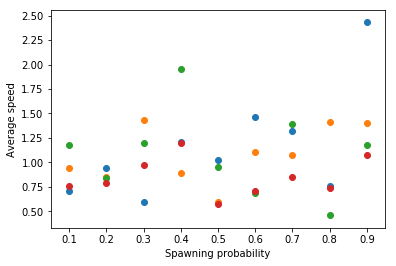

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
    
def plots_1(**kwargs):
#     throughput_vs_maximal_speed(**kwargs)
#     convergence_vs_maximal_speed(**kwargs)
#     convergence_vs_p_spawn(**kwargs)
#     mean_crossover_vs_maximal_speed(**kwargs)
#     throughput_vs_p_spawn(**kwargs)
#     mean_crossover_vs_p_spawn(**kwargs)
    average_speed_vs_p_spawn(**kwargs)
    
plots_1(p_spawn=0.1, max_speed_horizontal=12, max_speed_vertical=12)

y=-0.793939393939394x+-0.5333333333333332 with R^2=0.7133474664338862


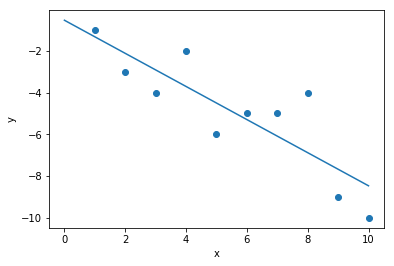

In [3]:
# Fit line to data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = -1 * np.array([1, 3, 4, 2, 6, 5, 5, 4, 9, 10]).reshape(-1, 1)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)
a = model.coef_
b = model.intercept_
R2 = model.score(x, y)
print("y={}x+{} with R^2={}".format(a[0][0], b[0], R2))

# predict y from the data
x_new = np.linspace(0, 10, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [ ]:
interact(plots_1, p_spawn=(0.1, 1, 0.1), max_speed_horizontal=(3, 24), max_speed_vertical=(3, 24))

Text(0, 0.5, 'Count')

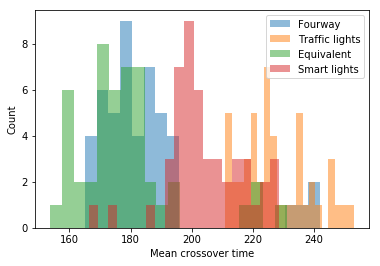

In [5]:
# Histograms
# set some parameters :
speeds = range(3, 15)
p_spawn=[0.1,0.3, 0.6,0.9]

cross_dict = {}

for intersection in INTERSECTION_HUMAN.keys():
    mean_crossover_per_intersection = []
    for speed in speeds:
        for p in p_spawn:
            parameters = get_parameters(p, speed, speed, intersection)
            datawriter = DataWriter()
            data = datawriter.get_runs_by_parameters(parameters)
            mean_crossover_per_intersection.append(data['results']['mean_crossover_time'][-1])
    cross_dict[intersection] = mean_crossover_per_intersection

for key in cross_dict.keys():
    plt.hist(cross_dict[key],bins = 20, label = INTERSECTION_HUMAN[key], alpha = .5)
plt.legend()
plt.xlabel('Mean crossover time')
plt.ylabel('Count')

AttributeError: 'dict' object has no attribute 'index'

/home/roland/.local/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


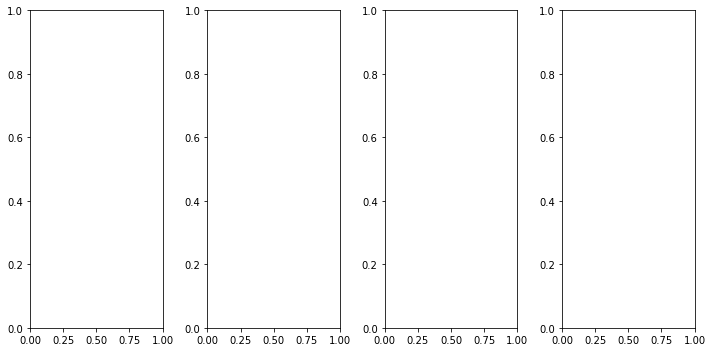

In [11]:
fig, axs = plt.subplots(1, 4, figsize = (10,5), sharey=False, tight_layout=True)

for key in cross_dict.keys():
    ind = cross_dict.index(key)
    axs[ind].hist(cross_dict[key], bins = 15, label = INTERSECTION_HUMAN[key], alpha = .5)
    axs[ind].set_title(INTERSECTION_HUMAN[key])
    axs[ind].set_ylabel('Frequency')
    axs[ind].set_xlabel('Mean crossover time')